# CHILDES Dataset Analysis

Comparing the different languages within the CHILDES dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from datasets import load_dataset, get_dataset_config_names
from tqdm import tqdm

DATASET_PATH = '../CHILDES-dataset'

sns.set_theme(style="whitegrid")

/Users/zebulongoriely/Documents/UniDocs/PHD/research/projects/CHILDES_processor/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
languages = get_dataset_config_names('transformersegmentation/CHILDES')
print('Languages:', languages)
datasets = {language : load_dataset('transformersegmentation/CHILDES', language, split='train') for language in languages}

Languages: ['English', 'EnglishUK', 'French', 'German', 'Spanish', 'Dutch', 'Mandarin', 'Japanese', 'Cantonese', 'Estonian', 'Croatian', 'Danish', 'Basque', 'Hungarian', 'Turkish', 'Farsi', 'Icelandic', 'Indonesian', 'Irish', 'Welsh', 'Korean', 'Swedish', 'Norwegian', 'Quechua', 'Catalan', 'Italian', 'PortuguesePt', 'PortugueseBr', 'Romanian']


In [3]:
properties = pd.DataFrame(columns=['language', 'n_utterances', 'n_words', 'n_phonemes', 'unique_words'])
properties.set_index('language', inplace=True)
properties.index.name = 'language'

for language, dataset in datasets.items():
    lines = list(dataset['phonemized_utterance'])
    n_utterances = len(lines)
    word_counts = [utterance.count('WORD_BOUNDARY') for utterance in lines]
    n_words = sum(word_counts)
    n_phonemes = sum(len(utterance.split(' ')) - word_count for utterance, word_count in zip(lines, word_counts))
    unique_words = [w.strip() for w in ' '.join(lines).split('WORD_BOUNDARY')]
    unique_words = len(set(unique_words))

    properties.loc[language] = [n_utterances, n_words, n_phonemes, unique_words]

properties

,n_utterances,n_words,n_phonemes,unique_words
language,,,,
English,1636954,7047276,22004387,35636
EnglishUK,1236828,5124437,15600492,22396
French,422133,1949028,5447197,17292
German,840888,3846882,14732507,56066
Spanish,276462,1222573,4355112,25244
Dutch,287497,1204006,4176468,20863
Mandarin,314071,1459758,4575506,8652
Japanese,402076,1086271,4241288,28830
Cantonese,126727,549138,1346898,3511


## Dataset Properties

In [32]:
# Plot average utterance length as a red dashed line
gradient = properties['n_words'] / properties['n_utterances']
gradient = gradient.mean()
min_utterances = properties['n_utterances'].min()
max_utterances = properties['n_utterances'].max()

# Plot as interactive plotly plot
fig = px.scatter(properties, x='n_utterances', y='n_words', text=properties.index)
fig.update_traces(textposition='top center')
fig.update_layout(title='Number of utterances vs number of words in CHILDES datasets',
                  xaxis_title='Number of utterances',
                  yaxis_title='Number of words',
                  xaxis_type='log',
                  yaxis_type='log',
                  height=800)
fig.add_shape(type='line',
              x0=min_utterances,
              y0=min_utterances * gradient,
              x1=max_utterances,
              y1=max_utterances * gradient,
              line=dict(color='red', dash='dash', width=1))                  
fig.show()

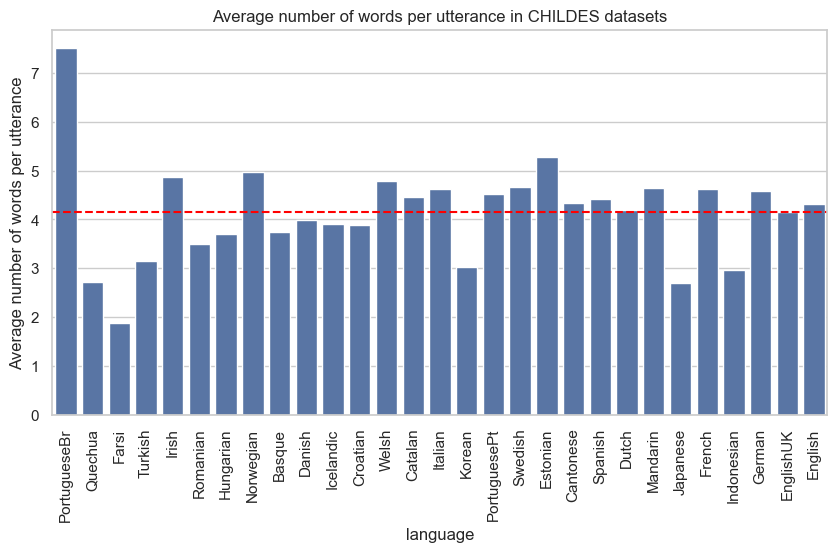

In [5]:
# Plot average length of utterances in each language
plt.figure(figsize=(10, 5))
# Sort by n_words
properties = properties.sort_values('n_utterances')
properties['average_sentence_length'] = properties['n_words'] / properties['n_utterances']
sns.barplot(data=properties, x=properties.index, y='average_sentence_length')
plt.axhline(y=properties['average_sentence_length'].mean(), color='red', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Average number of words per utterance')
plt.title('Average number of words per utterance in CHILDES datasets')
plt.show()



In [6]:
gradient = properties['n_phonemes'] / properties['n_words']
gradient = gradient.mean()
min_words = properties['n_words'].min()
max_words = properties['n_words'].max()

# Plot number of words against number of phonemes, with language name next to each point
fig = px.scatter(properties, x='n_words', y='n_phonemes', text=properties.index)
fig.update_traces(textposition='top center')
fig.update_layout(title='Number of words vs number of phonemes in CHILDES datasets',
                  xaxis_title='Number of words',
                  yaxis_title='Number of phonemes',
                  xaxis_type='log',
                  yaxis_type='log',
                  height=800)
fig.add_shape(type='line',
                x0=min_words,
                y0=min_words * gradient,
                x1=max_words,
                y1=max_words * gradient,
                line=dict(color='red', dash='dash', width=1))
fig.show()


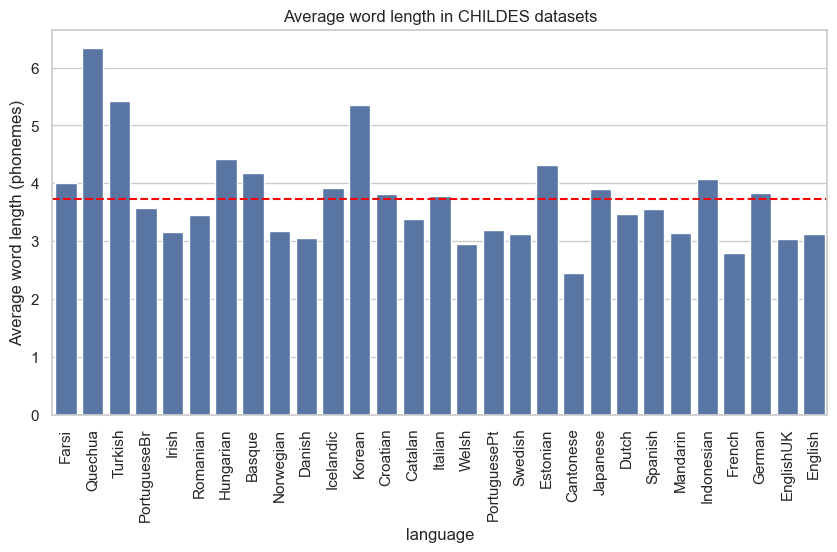

In [7]:
# Plot average length of words in each language
plt.figure(figsize=(10, 5))
# Sort by n_words
properties = properties.sort_values('n_words')
properties['average_word_length'] = properties['n_phonemes'] / properties['n_words']
sns.barplot(data=properties, x=properties.index, y='average_word_length')
plt.axhline(y=properties['average_word_length'].mean(), color='red', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Average word length (phonemes)')
plt.title('Average word length in CHILDES datasets')
plt.show()


## Language Properties

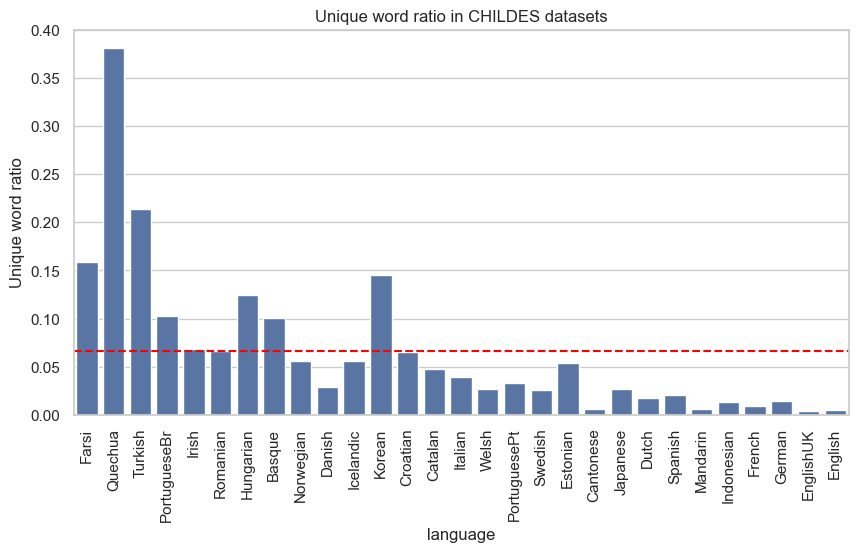

In [8]:
# Plot the ratio of unique words to words in each language
plt.figure(figsize=(10, 5))
# Sort by n_words
properties = properties.sort_values('n_words')
properties['unique_word_ratio'] = properties['unique_words'] / properties['n_words']
sns.barplot(data=properties, x=properties.index, y='unique_word_ratio')
plt.axhline(y=properties['unique_word_ratio'].mean(), color='red', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Unique word ratio')
plt.title('Unique word ratio in CHILDES datasets')
plt.show()


In [9]:
# Plot heap's law for English
english = datasets['English']
lines = list(english['phonemized_utterance'])
np.random.shuffle(lines)
n_words = []
unique_words = []
vocabulary = set()
total_words = 0
for i, line in enumerate(tqdm(lines)):
    words = [word.strip() for word in line.split('WORD_BOUNDARY') if word.strip() != '']
    total_words += len(words)
    n_words.append(total_words)
    vocabulary.update(words)
    unique_words.append(len(vocabulary))

100%|██████████| 1636954/1636954 [00:02<00:00, 598788.61it/s]


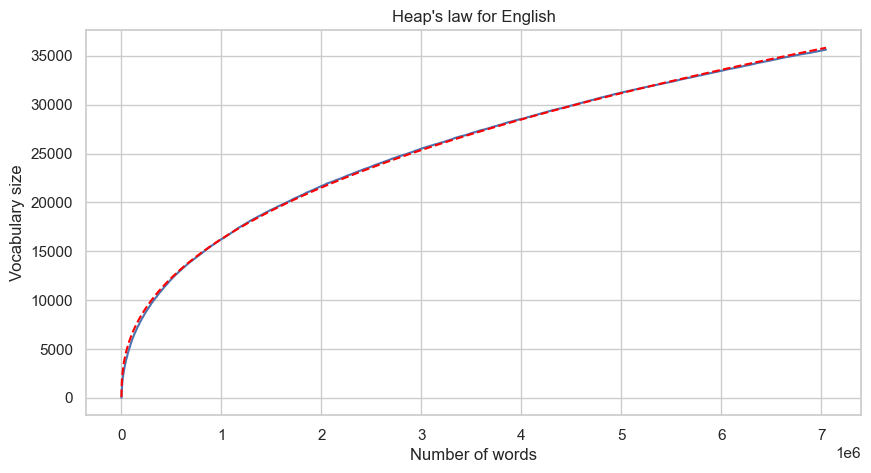

Heap's law for English: V = 60.68 * N^0.40


In [10]:
# Fit a power law to the data
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

popt, pcov = curve_fit(power_law, n_words, unique_words)
a, b = popt
plt.figure(figsize=(10, 5))
plt.plot(n_words, unique_words)
plt.plot(n_words, power_law(n_words, a, b), color='red', linestyle='--')
plt.xlabel('Number of words')
plt.ylabel('Vocabulary size')
plt.title("Heap's law for English")
plt.show()

print(f'Heap\'s law for English: V = {a:.2f} * N^{b:.2f}')


Heap's law for English: V = 54.91 * N^0.41
Heap's law for EnglishUK: V = 81.90 * N^0.36
Heap's law for French: V = 42.99 * N^0.41
Heap's law for German: V = 21.59 * N^0.52
Heap's law for Spanish: V = 33.01 * N^0.47
Heap's law for Dutch: V = 20.55 * N^0.50
Heap's law for Mandarin: V = 66.75 * N^0.34
Heap's law for Japanese: V = 19.68 * N^0.53
Heap's law for Cantonese: V = 47.95 * N^0.33
Heap's law for Estonian: V = 16.68 * N^0.56
Heap's law for Croatian: V = 21.48 * N^0.52
Heap's law for Danish: V = 21.59 * N^0.45
Heap's law for Basque: V = 16.35 * N^0.56
Heap's law for Hungarian: V = 8.46 * N^0.63
Heap's law for Turkish: V = 6.58 * N^0.64
Heap's law for Farsi: V = 5.32 * N^0.60
Heap's law for Icelandic: V = 16.80 * N^0.53
Heap's law for Indonesian: V = 56.43 * N^0.42
Heap's law for Irish: V = 12.09 * N^0.51
Heap's law for Welsh: V = 36.06 * N^0.42
Heap's law for Korean: V = 12.08 * N^0.63
Heap's law for Swedish: V = 34.65 * N^0.44
Heap's law for Norwegian: V = 14.50 * N^0.53
Heap's law

/Users/zebulongoriely/Documents/UniDocs/PHD/research/projects/CHILDES_processor/env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



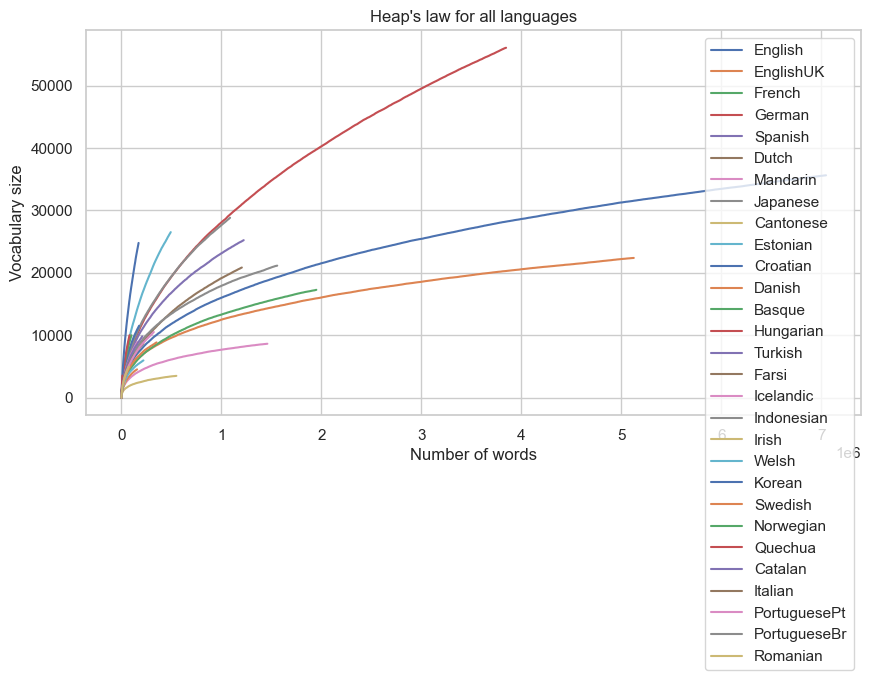

In [11]:
# Plot heaps law for all languages
heap_parameters = {}
plt.figure(figsize=(10, 5))
for language, dataset in datasets.items():
    lines = list(dataset['phonemized_utterance'])
    np.random.shuffle(lines)
    n_words = []
    unique_words = []
    vocabulary = set()
    total_words = 0
    for i, line in enumerate(lines):
        words = [word.strip() for word in line.split('WORD_BOUNDARY') if word.strip() != '']
        total_words += len(words)
        n_words.append(total_words)
        vocabulary.update(words)
        unique_words.append(len(vocabulary))
    plt.plot(n_words, unique_words, label=language)

    # Fit a power law to the data
    popt, pcov = curve_fit(power_law, n_words, unique_words)
    a, b = popt
    heap_parameters[language] = (a, b)
    print(f'Heap\'s law for {language}: V = {a:.2f} * N^{b:.2f}')

plt.xlabel('Number of words')
plt.ylabel('Vocabulary size')
plt.legend()
plt.title("Heap's law for all languages")
plt.show()


## Information content

100%|██████████| 29/29 [00:12<00:00,  2.25it/s]


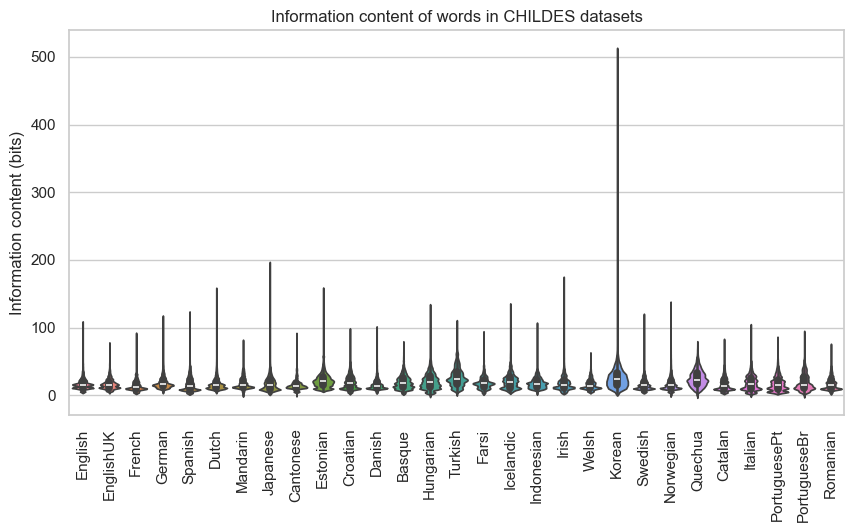

In [12]:
phoneme_frequencies = {}
totals = {}
for language, dataset in datasets.items():
    lines = list(dataset['phonemized_utterance'])
    phonemes = [phoneme for line in lines for phoneme in line.split(' ')]
    phoneme_frequencies[language] = pd.Series(phonemes).value_counts()
    phoneme_frequencies[language] = phoneme_frequencies[language][phoneme_frequencies[language] > 100]
    totals[language] = phoneme_frequencies[language].sum()

def word_information(word, language):
    # Estimate the information content of a word using the phoneme frequencies
    phonemes = word.split(' ')
    information = 0
    for phoneme in phonemes:
        if phoneme in phoneme_frequencies[language]:
            p = phoneme_frequencies[language][phoneme] / totals[language]
            information += -np.log2(p)
    return information

# Calculate the information content of each word in each language
information_content = {}
for language, dataset in tqdm(datasets.items()):
    lines = list(dataset['phonemized_utterance'])
    np.random.shuffle(lines)
    lines = lines[:10000]
    words = [word.strip() for line in lines for word in line.split('WORD_BOUNDARY') if word.strip() != '']
    information_content[language] = [word_information(word, language) for word in words]

# Plot the information content of words in each language
plt.figure(figsize=(10, 5))
sns.violinplot(data=information_content)
plt.xticks(rotation=90)
plt.ylabel('Information content (bits)')
plt.title('Information content of words in CHILDES datasets')
plt.show()



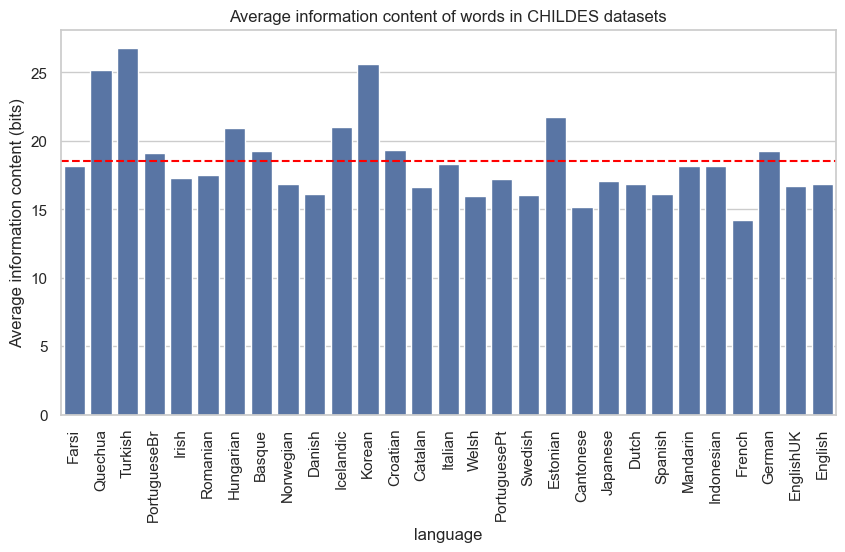

In [13]:
# Plot average information content of words in each language
plt.figure(figsize=(10, 5))
# Sort by n_words
properties = properties.sort_values('n_words')
properties['average_information_content'] = [np.mean(information_content[language]) for language in properties.index]
sns.barplot(data=properties, x=properties.index, y='average_information_content')
plt.axhline(y=properties['average_information_content'].mean(), color='red', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Average information content (bits)')
plt.title('Average information content of words in CHILDES datasets')
plt.show()


100%|██████████| 29/29 [00:15<00:00,  1.88it/s]


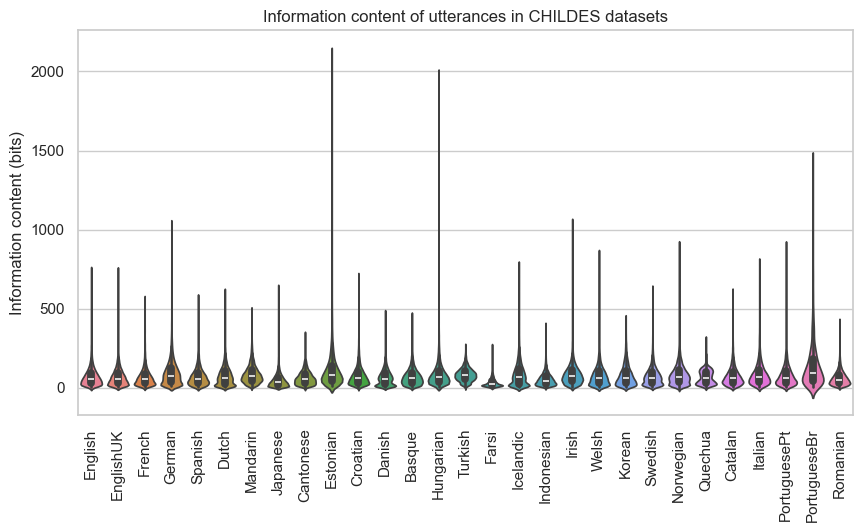

In [14]:
# Calculate the information content of each utterance in each language
information_content = {}
for language, dataset in tqdm(datasets.items()):
    lines = list(dataset['phonemized_utterance'])
    lines = [line.replace(' WORD_BOUNDARY', '') for line in lines]
    np.random.shuffle(lines)
    lines = lines[:10000]
    information_content[language] = [word_information(line, language) for line in lines]

# Plot the information content of utterances in each language
plt.figure(figsize=(10, 5))
sns.violinplot(data=information_content)
plt.xticks(rotation=90)
plt.ylabel('Information content (bits)')
plt.title('Information content of utterances in CHILDES datasets')
plt.show()



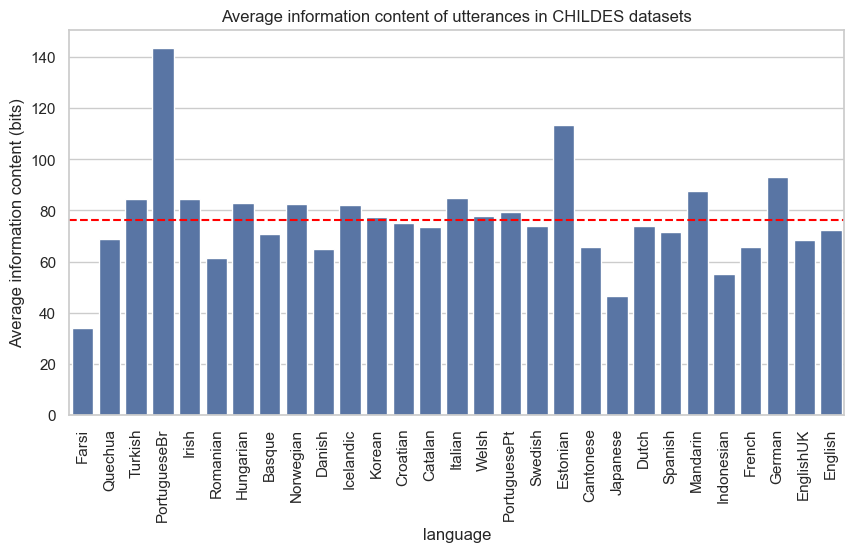

In [15]:
# Plot average information content of utterances in each language
plt.figure(figsize=(10, 5))
# Sort by n_words
properties = properties.sort_values('n_words')
properties['average_information_content'] = [np.mean(information_content[language]) for language in properties.index]
sns.barplot(data=properties, x=properties.index, y='average_information_content')
plt.axhline(y=properties['average_information_content'].mean(), color='red', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Average information content (bits)')
plt.title('Average information content of utterances in CHILDES datasets')
plt.show()


## Age Analysis

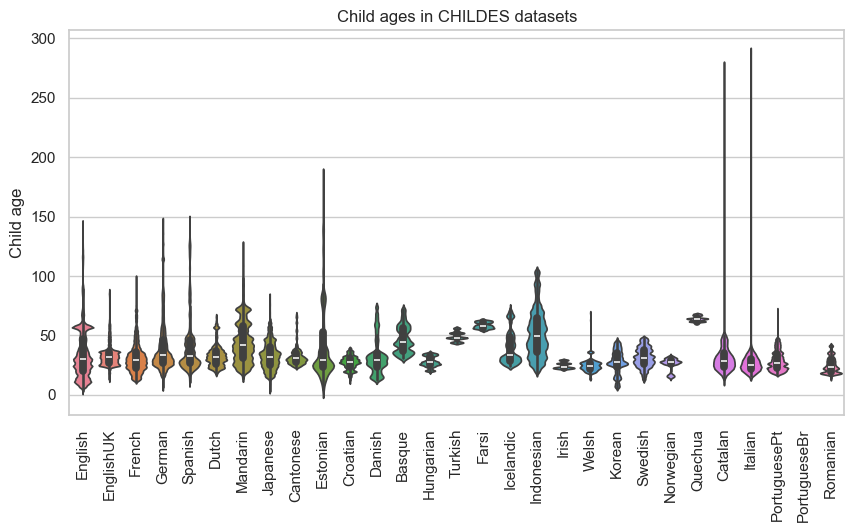

In [16]:
# Plot violin plot of child ages in each language
ages = {language : dataset['target_child_age'] for language, dataset in datasets.items()}
plt.figure(figsize=(10, 5))
sns.violinplot(data=ages)
plt.xticks(rotation=90)
plt.ylabel('Child age')
plt.title('Child ages in CHILDES datasets')
plt.show()


In [17]:
# For English, get 10 bins of equal size for target_child_age
english = pd.DataFrame(datasets['English'])
english['target_child_age'] = english['target_child_age'].astype(float)
english['age_bin'] = pd.qcut(english['target_child_age'], 10)
age_bins = english['age_bin'].unique()
age_bins = age_bins.sort_values()


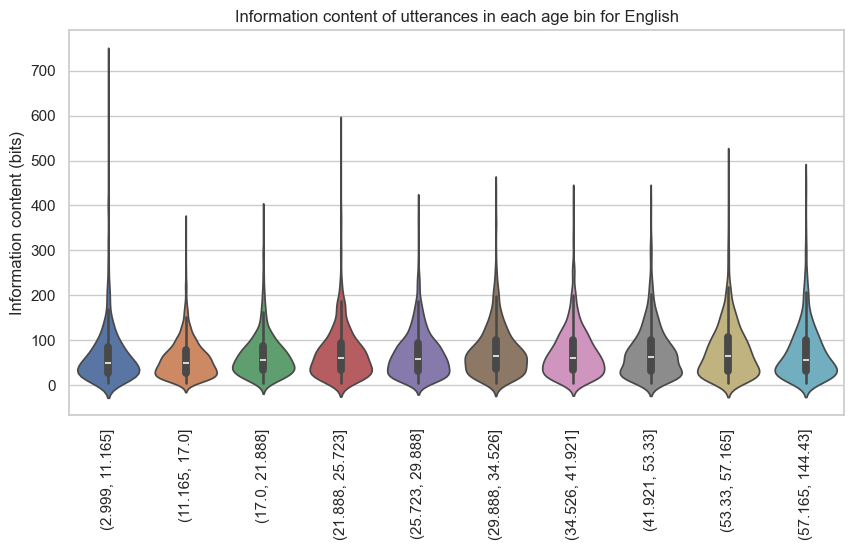

In [18]:
# Calculate the information content of each utterance in each age bin
information_content = {}
for age_bin in age_bins:
    lines = list(english[english['age_bin'] == age_bin]['phonemized_utterance'])
    lines = [line.replace(' WORD_BOUNDARY', '') for line in lines]
    np.random.shuffle(lines)
    lines = lines[:1000]
    information_content[age_bin] = [word_information(line, 'English') for line in lines]

# Plot the information content of utterances in each age bin
plt.figure(figsize=(10, 5))
sns.violinplot(data=information_content)
plt.xticks(rotation=90)
plt.ylabel('Information content (bits)')
plt.title('Information content of utterances in each age bin for English')

plt.show()

/Users/zebulongoriely/Documents/UniDocs/PHD/research/projects/CHILDES_processor/env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning:

Mean of empty slice.

/Users/zebulongoriely/Documents/UniDocs/PHD/research/projects/CHILDES_processor/env/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide



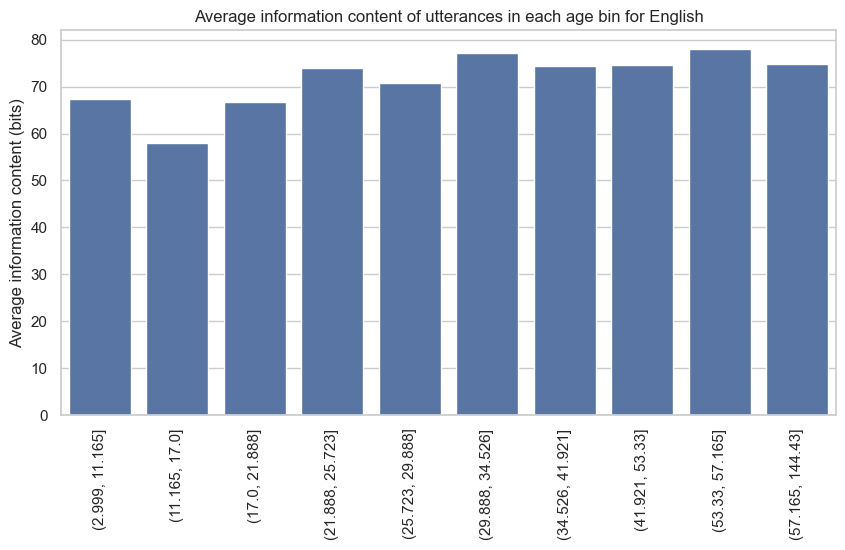

In [27]:
# Plot averages
plt.figure(figsize=(10, 5))
averages = {age_bin : np.mean(information_content[age_bin]) for age_bin in information_content}
sns.barplot(x=list(averages.keys()), y=list(averages.values()))
plt.xticks(rotation=90)
plt.ylabel('Average information content (bits)')
plt.title('Average information content of utterances in each age bin for English')
plt.show()


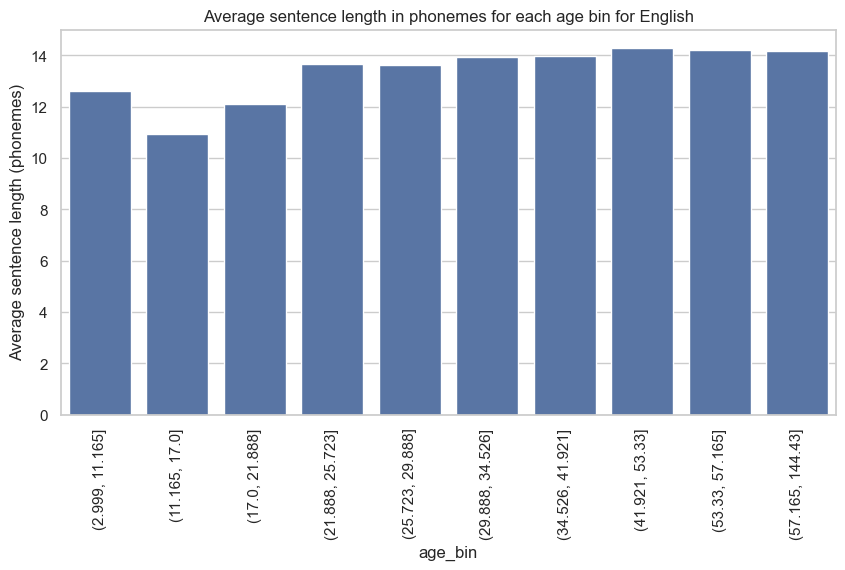

In [28]:
# Get average sentence length in phonemes for each bin
sentence_lengths = pd.DataFrame(columns=['age_bin', 'average_sentence_length'])
sentence_lengths.set_index('age_bin', inplace=True)
sentence_lengths.index.name = 'age_bin'

for age_bin in age_bins:
    lines = list(english[english['age_bin'] == age_bin]['phonemized_utterance'])
    n_utterances = len(lines)
    if n_utterances == 0:
        continue
    word_counts = [utterance.count('WORD_BOUNDARY') for utterance in lines]
    n_words = sum(word_counts)
    n_phonemes = sum(len(utterance.split(' ')) - word_count for utterance, word_count in zip(lines, word_counts))
    sentence_lengths.loc[age_bin] = n_phonemes / n_utterances

plt.figure(figsize=(10, 5))
sns.barplot(data=sentence_lengths, x=sentence_lengths.index, y='average_sentence_length')
plt.xticks(rotation=90)
plt.ylabel('Average sentence length (phonemes)')
plt.title('Average sentence length in phonemes for each age bin for English')
plt.show()


